In [6]:
# importing the proper librarys
import pandas as pd 
import matplotlib.pyplot as plt
!pip install arabic-reshaper
!pip install python-bidi
!pip install pandas-profiling
import arabic_reshaper
from bidi.algorithm import get_display
from pandas_profiling import ProfileReport


In [7]:
def get_top_50_names(names,Areaa): # function to fillter the top sales 
    i = Areaa
    name_neighbour_above_50 = []
    number_of_sales_above_50 = []

    for name in names:
        Count = i.loc[df_clean['Neighbourhood'] == name]
        count = Count.shape[0]
        if count > 50:
            name_neighbour_above_50.append(name)
            number_of_sales_above_50.append(count)

    return name_neighbour_above_50, number_of_sales_above_50


In [8]:
def calculate_average_price(name_list, data_frame): # function to calculate the Average for the price per meter 
    averages = []
    for name in name_list:
        neighborhood_data = data_frame.loc[df_clean['Neighbourhood'] == name]
        average_price = neighborhood_data['Price_per_meter'].mean()
        averages.append(average_price)
    return averages


In [9]:
df= pd.read_csv('real_state_riyadh.csv')

In [10]:
df.head()

,Neighbourhood,Plannedـtransactionـdetails,Detailsـtransaction,Date,transactionـnumber,Total_price,Area,Price_per_meter
0,10186 فى/ 28/ 7/ 142…,مخطط/3738,قطعة 176,"Thursday, 13 January 2022",15906251,834782.0,642.14,1300.00
1,10186 فى/ 28/ 7/ 142…,مخطط/3738,قطعة 178,"Thursday, 13 January 2022",15906446,780000.0,600.00,1300.00
2,10186 فى/ 28/ 7/ 142…,مخطط/3738,قطعة 180,"Thursday, 13 January 2022",15906513,780000.0,600.00,1300.00
3,10186 فى/ 28/ 7/ 142…,مخطط/3738,قطعة 182,"Thursday, 13 January 2022",15906597,780000.0,600.00,1300.00
4,10186 فى/ 28/ 7/ 142…,مخطط/3738,قطعة 184,"Thursday, 13 January 2022",15906669,772688.0,594.38,1300.00


In [11]:
#Apply the essential EDA steps: head, shape, info, describe, missing values
print('''
    shape of the dataFrame {}
    info for the dataFrame {}
    Null value {}
'''.format(df.shape,df.info,df.isnull().sum().sum()))


    shape of the dataFrame (14269, 8)
    info for the dataFrame <bound method DataFrame.info of                Neighbourhood Plannedـtransactionـdetails Detailsـtransaction  \
0      10186 فى/ 28/ 7/ 142…                   مخطط/3738            قطعة 176   
1      10186 فى/ 28/ 7/ 142…                   مخطط/3738            قطعة 178   
2      10186 فى/ 28/ 7/ 142…                   مخطط/3738            قطعة 180   
3      10186 فى/ 28/ 7/ 142…                   مخطط/3738            قطعة 182   
4      10186 فى/ 28/ 7/ 142…                   مخطط/3738            قطعة 184   
...                      ...                         ...                 ...   
14264                  هدبان                   مخطط/2837          قطعة 256/2   
14265                  هدبان                   مخطط/2837          قطعة 257/1   
14266             وادى العرج                   مخطط/3242         قطعة 1965/2   
14267                   واسط                   مخطط/3242         قطعة 1544/1   
14268                 

In [12]:
profile = ProfileReport(df)
profile.to_notebook_iframe()
# to show the profile report 

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
unique_names = []
for name in df['Neighbourhood']:
    if name not in unique_names:
        unique_names.append(name)

for name in unique_names:
    print(name)
# to see the list of the Neighbourhood and what we need to remove 

10186 فى/ 28/ 7/ 142…
1353 فى/ 20/ 5/ 1413
6 / 8 / 2 / 1429
667/ 23/ 9/ 1410
6868 فى/ 3/ 12/ 1411
أحد
أخرى
ارضة الجو منطقة العز…
اشبيليا
الازدهار
الامانة
الاندلس
البايونية
البديعة
البرية
البطحاء
البيان
التعاون
الثقبة
الجرادية
الجزيرة
الجنادرية
الجهه الغربية
الحائر
الحزم
الحمراء
الخالدية
الخليج
الخويلدية
الخير
الدار البيضاء
الدريهمية
الرابية
الراية
الربوة
الربيع
الرحمانية
الرسالة
الرفيعة
الرقيقة
الرمال
الروابى
الروضة
الريان
الزاهر
الزهرة
الزهور
السعادة
السلام
السلام بسيهات
السلى
السليمانية
السوق
السويدى
الشرفية
الشرق
الشعلة
الشعيب
الشفاء
الشقة
الشلهوب
الشميسى
الشهداء
الصالحية
الصحافة
الصفاء
الضباط
العارض
العريجاء
العزيزية
العقيق
العلا
العليا
العوالي
العود
الغدير
الغروب
الغنامية
الفاروق
الفلاح
الفيحاء
الفيصلية
القادسية
القاع البارد
القدس
القرى
القيروان
المحلة بجبل سلا
المحمدية
المخروقه
المربع
المرسلات
المرقب
المروة
المروج
المشرق
المصانع
المصفاة
المصيف
المعذر
المعيزلية
المغرزات
الملز
الملقا
الملك عبد الله
الملك فهد
الملك فيصل
المناخ
المنار
المنصورة
المنصورية
المهدية
المونسية
النخبة
النخيل

In [14]:
# Create a new DataFrame without rows containing names with numbers
df_clean = df[~df['Neighbourhood'].str.contains('\d')]#removing garbage data that has data or number in the Neighbourhood column

df_clean

,Neighbourhood,Plannedـtransactionـdetails,Detailsـtransaction,Date,transactionـnumber,Total_price,Area,Price_per_meter
15,أحد,مخطط/2022,قطعة 172,"Tuesday, 18 January 2022",15942311,1250000.0,600.00,2083.00
16,أحد,مخطط/2022,قطعة 173,"Tuesday, 18 January 2022",15941902,1245000.0,600.00,2075.00
17,أحد,مخطط/2485,قطعة 381,"Sunday, 16 January 2022",15920608,866250.0,825.00,1050.00
18,أحد,مخطط/3152,قطعة 215,"Tuesday, 11 January 2022",15879149,300000.0,704.00,426.00
19,أخرى,مخطط/1669,قطعة بدون,"Sunday, 30 January 2022",16022794,450000.0,253.10,1778.00
...,...,...,...,...,...,...,...,...
14264,هدبان,مخطط/2837,قطعة 256/2,"Monday, 21 March 2022",16498618,2099475.0,399.9,"5,250"
14265,هدبان,مخطط/2837,قطعة 257/1,"Monday, 21 March 2022",16498578,1959510.0,399.9,"4,900"
14266,وادى العرج,مخطط/3242,قطعة 1965/2,"Sunday, 6 March 2022",16359548,718750.0,312.5,"2,300"
14267,واسط,مخطط/3242,قطعة 1544/1,"Wednesday, 30 March 2022",16609638,685000.0,300,"2,283"


In [15]:
# Droping columns
df_clean.drop('transactionـnumber', inplace=True, axis=1)
df_clean.drop('Plannedـtransactionـdetails', inplace=True, axis=1)
df_clean

/var/folders/tb/fw_49hkd2vl1gfskxm71_9xh0000gn/T/ipykernel_14447/649939095.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop('transactionـnumber', inplace=True, axis=1)
/var/folders/tb/fw_49hkd2vl1gfskxm71_9xh0000gn/T/ipykernel_14447/649939095.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop('Plannedـtransactionـdetails', inplace=True, axis=1)


,Neighbourhood,Detailsـtransaction,Date,Total_price,Area,Price_per_meter
15,أحد,قطعة 172,"Tuesday, 18 January 2022",1250000.0,600.00,2083.00
16,أحد,قطعة 173,"Tuesday, 18 January 2022",1245000.0,600.00,2075.00
17,أحد,قطعة 381,"Sunday, 16 January 2022",866250.0,825.00,1050.00
18,أحد,قطعة 215,"Tuesday, 11 January 2022",300000.0,704.00,426.00
19,أخرى,قطعة بدون,"Sunday, 30 January 2022",450000.0,253.10,1778.00
...,...,...,...,...,...,...
14264,هدبان,قطعة 256/2,"Monday, 21 March 2022",2099475.0,399.9,"5,250"
14265,هدبان,قطعة 257/1,"Monday, 21 March 2022",1959510.0,399.9,"4,900"
14266,وادى العرج,قطعة 1965/2,"Sunday, 6 March 2022",718750.0,312.5,"2,300"
14267,واسط,قطعة 1544/1,"Wednesday, 30 March 2022",685000.0,300,"2,283"


In [16]:
# df = df.drop(df[df['Neighbourhood'] == '10186 فى/ 28/ 7/ 142…'].index, axis=0)
# df

In [17]:
df_clean['Price_per_meter'] = df_clean['Price_per_meter'].str.replace(',', '')# filltering the , to so we can do mathmatical operation
df_clean['Area'] = df_clean['Area'].str.replace(',', '')
df_clean

/var/folders/tb/fw_49hkd2vl1gfskxm71_9xh0000gn/T/ipykernel_14447/1063756015.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Price_per_meter'] = df_clean['Price_per_meter'].str.replace(',', '')# filltering the , to so we can do mathmatical operation
/var/folders/tb/fw_49hkd2vl1gfskxm71_9xh0000gn/T/ipykernel_14447/1063756015.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Area'] = df_clean['Area'].str.replace(',', '')


,Neighbourhood,Detailsـtransaction,Date,Total_price,Area,Price_per_meter
15,أحد,قطعة 172,"Tuesday, 18 January 2022",1250000.0,600.00,2083.00
16,أحد,قطعة 173,"Tuesday, 18 January 2022",1245000.0,600.00,2075.00
17,أحد,قطعة 381,"Sunday, 16 January 2022",866250.0,825.00,1050.00
18,أحد,قطعة 215,"Tuesday, 11 January 2022",300000.0,704.00,426.00
19,أخرى,قطعة بدون,"Sunday, 30 January 2022",450000.0,253.10,1778.00
...,...,...,...,...,...,...
14264,هدبان,قطعة 256/2,"Monday, 21 March 2022",2099475.0,399.9,5250
14265,هدبان,قطعة 257/1,"Monday, 21 March 2022",1959510.0,399.9,4900
14266,وادى العرج,قطعة 1965/2,"Sunday, 6 March 2022",718750.0,312.5,2300
14267,واسط,قطعة 1544/1,"Wednesday, 30 March 2022",685000.0,300,2283


In [18]:
filtered_df = df_clean.loc[df['Neighbourhood'] == 'الرمال']

In [19]:
df_clean['Area']=df_clean['Area'].astype(float)
df_clean['Price_per_meter']=df_clean['Price_per_meter'].astype(float)

/var/folders/tb/fw_49hkd2vl1gfskxm71_9xh0000gn/T/ipykernel_14447/1892363530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Area']=df_clean['Area'].astype(float)
/var/folders/tb/fw_49hkd2vl1gfskxm71_9xh0000gn/T/ipykernel_14447/1892363530.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Price_per_meter']=df_clean['Price_per_meter'].astype(float)


In [20]:
profile = ProfileReport(df_clean)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [21]:
df_clean['Total_price'].sum()

15313490978.0

In [22]:
df_clean.shape[0]

14187

In [23]:
df_clean.isnull().sum()

Neighbourhood          0
Detailsـtransaction    0
Date                   0
Total_price            0
Area                   0
Price_per_meter        0
dtype: int64

In [24]:
# df.to_csv('/Users/majed-abdulkareem/Desktop/laps/Bootcamp-Project-2-Data-Analysis/Data/SAles.csv')

In [25]:
def months_realEstatesNumber(months):
    
    realEstatesNumber = [] 
    
    #save each month's number of occurrences in the dataset "Date" column
    for month in months:
        realEstatesNumber.append(df_clean["Date"].str.contains(month).sum())
    
    return realEstatesNumber
        
def days_realEstatesNumber(month, days):
    
    realEstatesNumber = []
    
    #save each day's number of occurrences in a specific month in the dataset "Date" column
    for day in days:
        realEstatesNumber.append(df_clean["Date"].str.contains('(?=.*'+month+')(?=.*'+day+')').sum())
        
    return realEstatesNumber

In [26]:
months = ["January","February","March"]
days = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

#create a list that will contains the number of real estates for each month
months_realEstatesNumberList = months_realEstatesNumber(months)

#save the index of the month with the most number of real estates
max_index = months_realEstatesNumberList.index(max(months_realEstatesNumberList))

#retrieve the name of the month with the most number of real estates
max_index_month = months[max_index]

#create a list that will contains the number of real estates for each day of the month saved in max_index_month
days_realEstatesNumberList = days_realEstatesNumber(max_index_month, days)

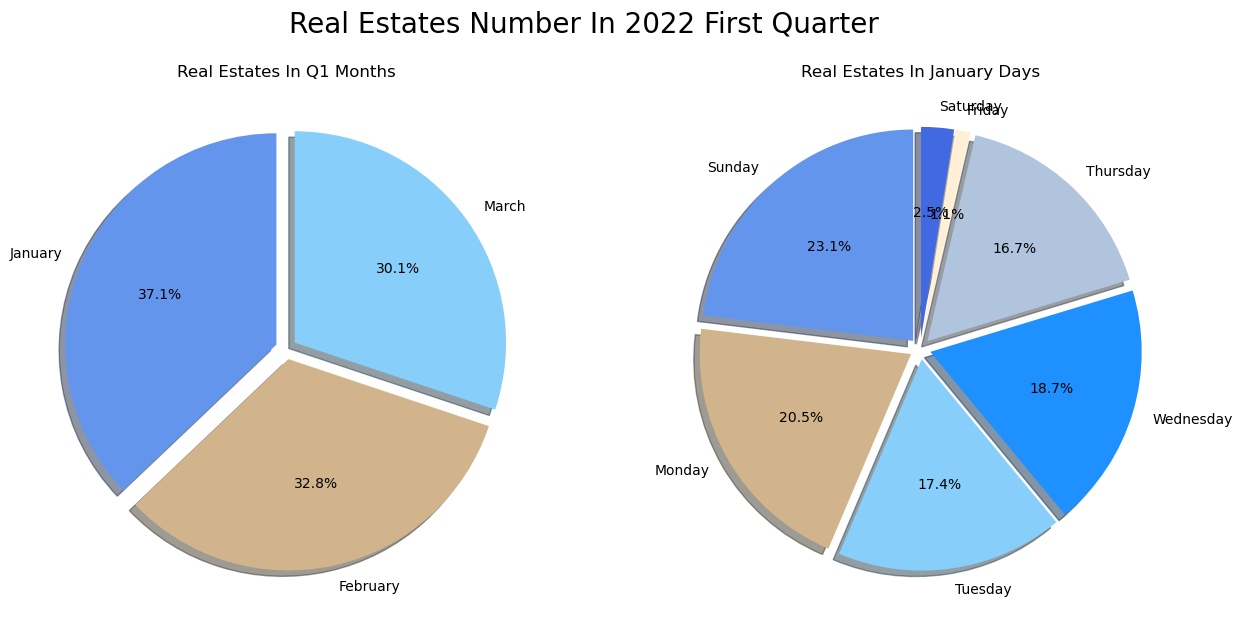

In [27]:
#plot two pie charts using subplot

plt.figure(figsize=[15,7])
plt.suptitle('Real Estates Number In 2022 First Quarter',fontsize = 20)

#first
plt.subplot(1,2,1) 

plt.title('Real Estates In Q1 Months')
plt.pie(months_realEstatesNumberList,labels=months, autopct='%1.1f%%', startangle=90, shadow=True, radius=1, explode = [0.05,0.05,0.05], colors=["cornflowerblue","Tan","lightskyblue"])


#second
plt.subplot(1,2,2)
# royalblue
# lightsteelblue
plt.title('Real Estates In '+months[max_index]+' Days')
plt.pie(days_realEstatesNumberList,labels=days, autopct='%1.1f%%', startangle=90, shadow=True, radius=1, explode = [0.05,0.05,0.05,0.05,0.05,0.05,0.05], colors=["cornflowerblue","Tan","lightskyblue","Dodgerblue","lightsteelblue","Papayawhip","royalblue"]);

In [28]:
Area_under300 = df_clean[df_clean['Area'] < 300]
AreaBetween300_600 = df_clean[df_clean['Area'].between(300,600)]
AreaAbove_600 = df_clean[df_clean['Area']>600]

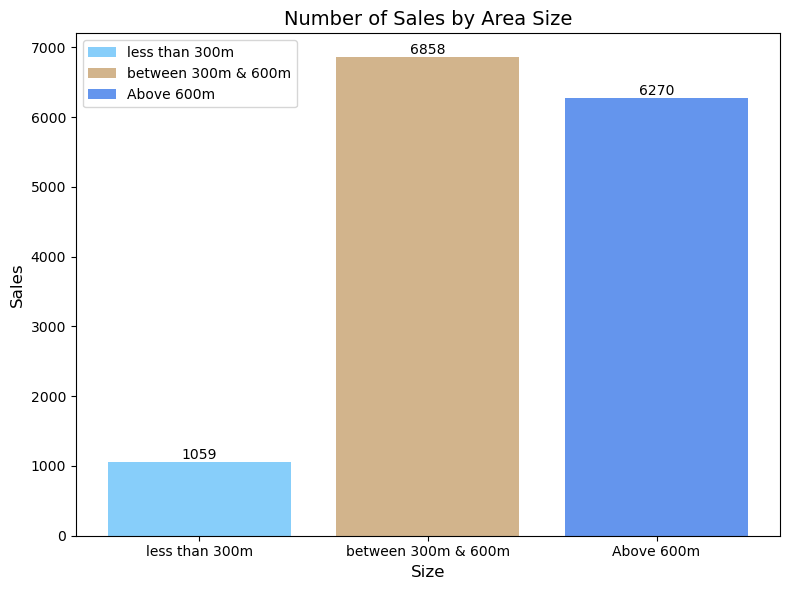

In [29]:

Areas = [Area_under300.shape[0], AreaBetween300_600.shape[0], AreaAbove_600.shape[0]]
Area_size = ['less than 300m', 'between 300m & 600m', 'Above 600m']

Area_size = ['less than 300m', 'between 300m & 600m', 'Above 600m']
colors = ["lightskyblue", "tan", "cornflowerblue"]

plt.figure(figsize=(8, 6))

for i, area in enumerate(Areas):
    plt.bar(Area_size[i], area, color=colors[i], label=Area_size[i])
    plt.text(i, area, str(area), ha='center', va='bottom')

plt.xlabel('Size', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.title('Number of Sales by Area Size', fontsize=14)
plt.tight_layout()

plt.legend()

plt.show()


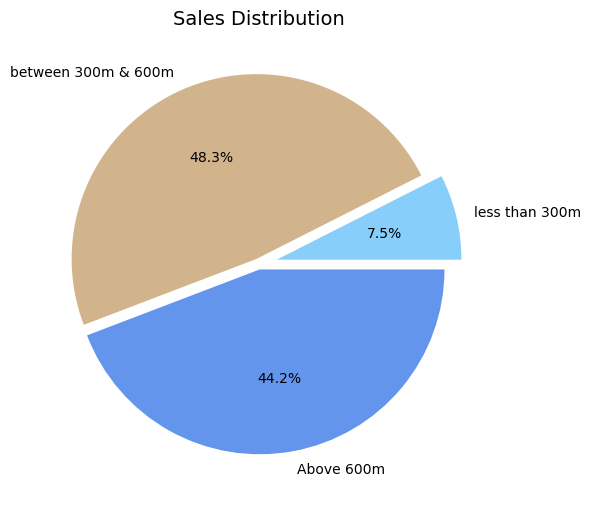

In [30]:
plt.figure(figsize=(15, 6))  # Set the figure size (width, height)

plt.pie(Areas, labels=Area_size, autopct='%1.1f%%',colors=["lightskyblue","Tan","cornflowerblue"],explode=[0.1,0.03,0.03])
plt.title('Sales Distribution', fontsize=14)

plt.show()

In [31]:
unique_names300to600 = []
for name in AreaBetween300_600['Neighbourhood']:
    if name not in unique_names300to600:
        unique_names300to600.append(name)

name_neighbour_above_50, number_of_sales_above_50 = get_top_50_names(unique_names300to600,AreaBetween300_600)
print(name_neighbour_above_50)




['اشبيليا', 'الخير', 'الرابية', 'الرمال', 'الروضة', 'السويدى', 'العريجاء', 'العزيزية', 'الفاروق', 'المصفاة', 'الملقا', 'المهدية', 'المونسية', 'النرجس', 'النسيم', 'النظيم', 'الياسمين', 'بدر', 'شرق الرياض', 'شمال البكيرية', 'طويق', 'عريض', 'قرطبة', 'لبن', 'نمار']


In [32]:
unique_names600 = []
for name in AreaAbove_600['Neighbourhood']:
    if name not in unique_names600:
        unique_names600.append(name)
name_neighbour_50_600, number_of_sales_50_600 = get_top_50_names(unique_names600,AreaAbove_600)
print(name_neighbour_50_600)


['الخير', 'الرمال', 'الروضة', 'المصفاة', 'الملقا', 'النرجس', 'شرق الرياض', 'عريض', 'عكاظ', 'نمار']


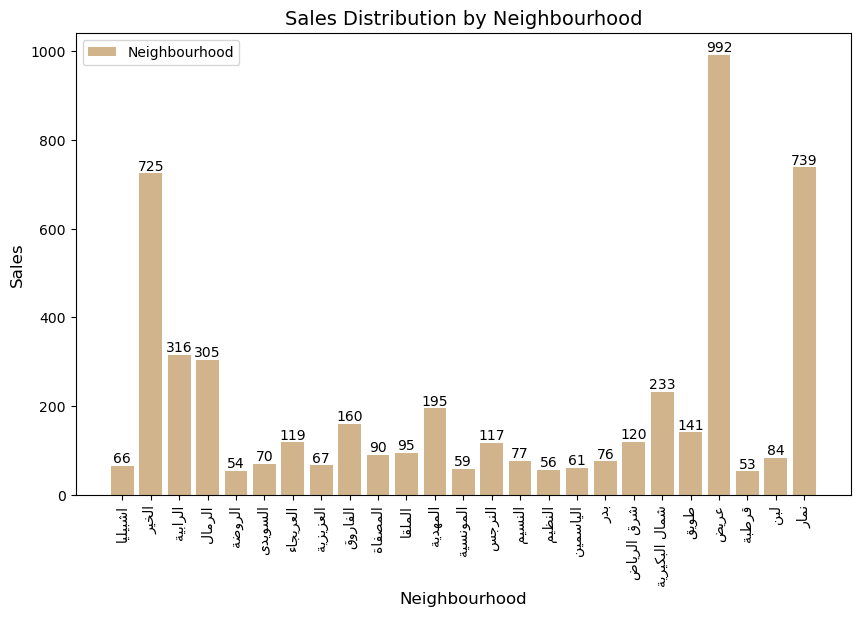

In [33]:
#between 300 to 600

# Reshape and format the Arabic labels
reshaped_labels = [get_display(arabic_reshaper.reshape(label)) for label in name_neighbour_above_50]

# Plotting code
plt.figure(figsize=(10, 6))  # Set the figure size

plt.bar(reshaped_labels, number_of_sales_above_50, label='Neighbourhood',color ='Tan')  # Add label for the legend
plt.xlabel('Neighbourhood', fontsize=12)  # Set x-label with font size
plt.ylabel('Sales', fontsize=12)  # Set y-label with font size
plt.xticks(rotation='vertical')

for i, name in enumerate(number_of_sales_above_50):
    plt.text(i, name, str(name), ha='center', va='bottom')

plt.title('Sales Distribution by Neighbourhood', fontsize=14)  # Add title with font size
plt.legend(fontsize=10)  # Add legend with font size

plt.show()


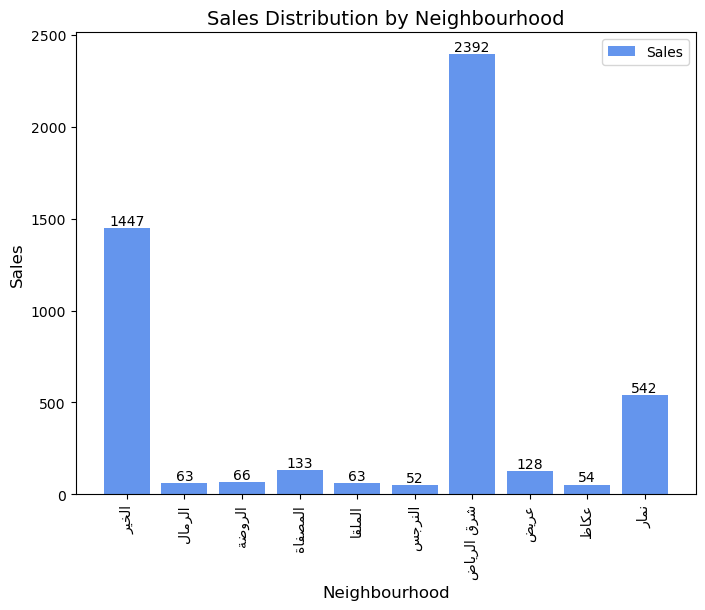

In [34]:
reshaped_labels2 = [get_display(arabic_reshaper.reshape(label)) for label in name_neighbour_50_600]

plt.figure(figsize=(8, 6))  # Set the figure size

plt.bar(reshaped_labels2, number_of_sales_50_600, label='Sales',color ='cornflowerblue')  # Plot the bar chart with a label
plt.xlabel('Neighbourhood', fontsize=12)  # Set x-label with font size
plt.ylabel('Sales', fontsize=12)  # Set y-label with font size
plt.xticks(rotation='vertical')

for i, name in enumerate(number_of_sales_50_600):
    plt.text(i, name, str(name), ha='center', va='bottom')  # Add text annotations to the bars

plt.title('Sales Distribution by Neighbourhood', fontsize=14)  # Add title with font size

plt.legend()  # Display the legend

plt.show()

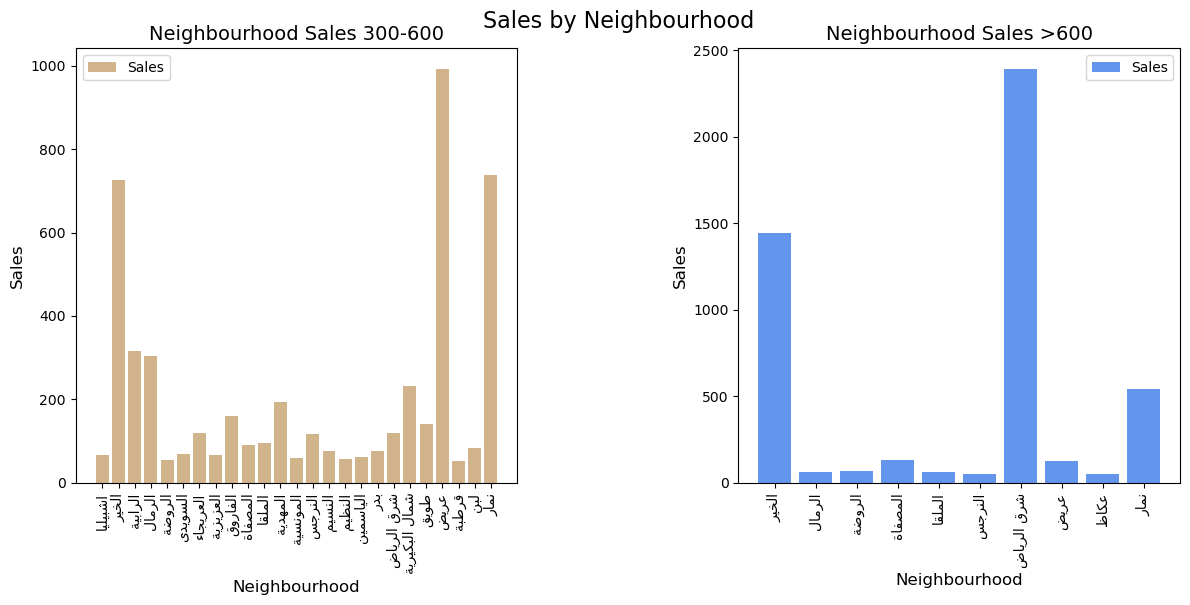

In [35]:


plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# First subplot: top 50 names
plt.subplot(1, 2, 1)
plt.bar(reshaped_labels, number_of_sales_above_50,color ='Tan')
plt.xlabel('Neighbourhood', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation='vertical', fontsize=10)
plt.title('Neighbourhood Sales 300-600', fontsize=14)
plt.tight_layout()  # Adjust spacing within the subplot
plt.legend(['Sales'], loc='best')

# Second subplot: names with 50 to 600 sales
plt.subplot(1, 2, 2)
plt.bar(reshaped_labels2, number_of_sales_50_600,color ='cornflowerblue')
plt.xlabel('Neighbourhood', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation='vertical', fontsize=10)
plt.title('Neighbourhood Sales >600', fontsize=14)
plt.tight_layout()  # Adjust spacing within the subplot
plt.legend(['Sales'], loc='best')

plt.subplots_adjust(wspace=0.5)  # Adjust spacing between subplots

plt.suptitle('Sales by Neighbourhood', fontsize=16, x=0.52, y=1)  # Title for the overall figure

plt.show()


In [36]:
AVE600 = calculate_average_price(name_neighbour_50_600, AreaAbove_600)

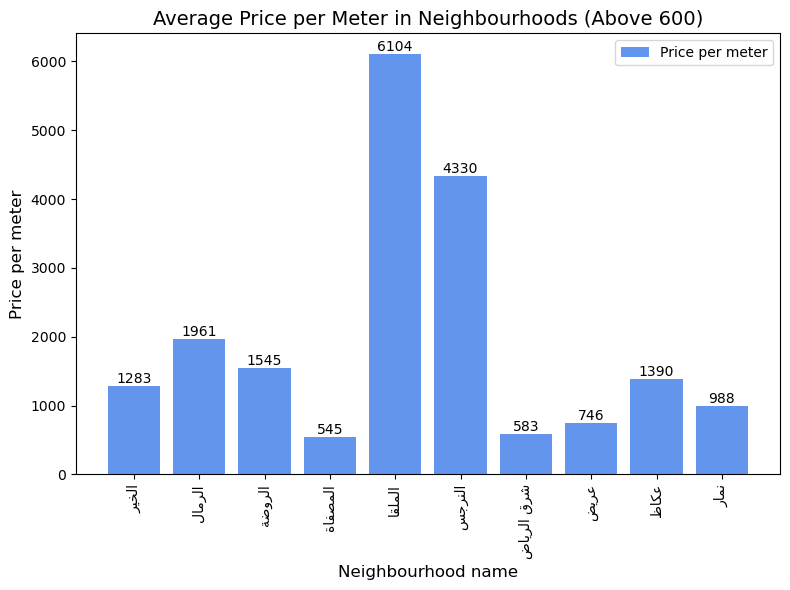

In [37]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

plt.bar(reshaped_labels2, AVE600,color ='cornflowerblue')
plt.xlabel('Neighbourhood name', fontsize=12)
plt.ylabel('Price per meter', fontsize=12)
plt.xticks(rotation='vertical', fontsize=10)
plt.title('Average Price per Meter in Neighbourhoods (Above 600)', fontsize=14)

for i, name in enumerate(AVE600):
    plt.text(i, name, str(round(name)), ha='center', va='bottom')

plt.tight_layout()  # Adjust spacing

plt.legend(['Price per meter'], loc='best')

plt.show()

In [38]:
AVE300_600 = calculate_average_price(name_neighbour_above_50, AreaBetween300_600)

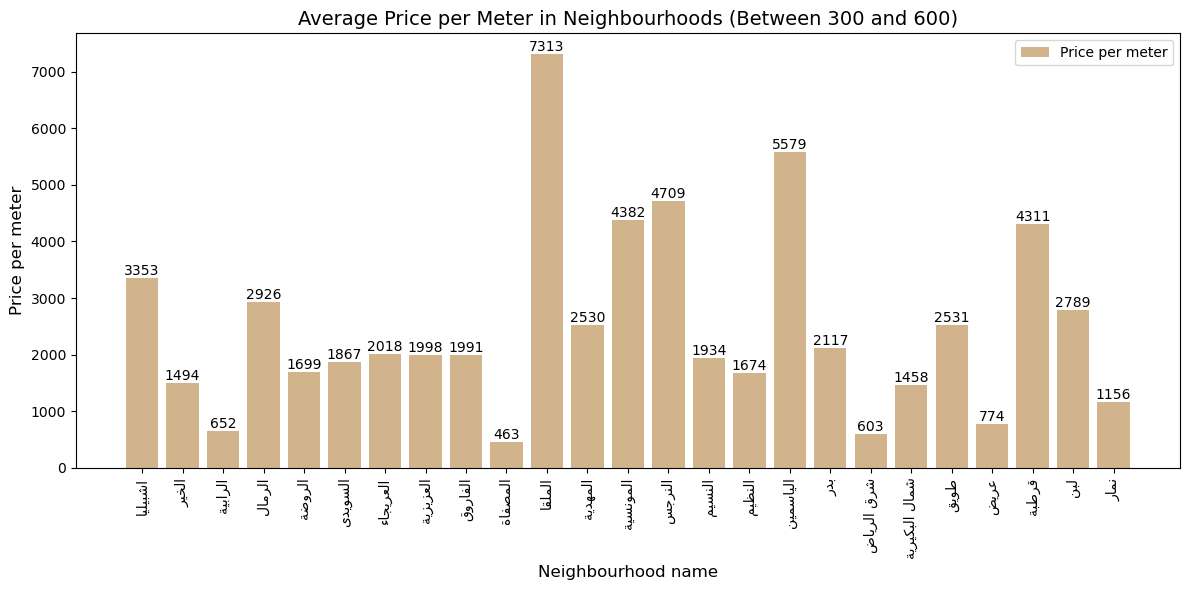

In [39]:
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

plt.bar(reshaped_labels, AVE300_600,color='Tan')
plt.xlabel('Neighbourhood name', fontsize=12)
plt.ylabel('Price per meter', fontsize=12)
plt.xticks(rotation='vertical', fontsize=10)
plt.title('Average Price per Meter in Neighbourhoods (Between 300 and 600)', fontsize=14)

for i, name in enumerate(AVE300_600):
    plt.text(i, name, str(round(name)), ha='center', va='bottom')

plt.tight_layout()  # Adjust spacing

plt.legend(['Price per meter'], loc='best')

plt.show()

In [40]:
#chart 1

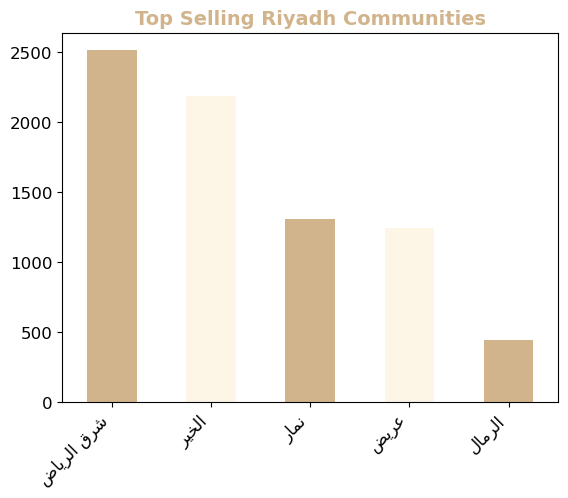

In [41]:
count_Neighbourhood_t=df_clean['Neighbourhood'].value_counts()
landss = count_Neighbourhood_t.head().index.tolist()

# Reshape the labels using arabic_reshaper and get_display
reshaped_labels = [get_display(arabic_reshaper.reshape(label)) for label in landss]

count_Neighbourhood_t.head().plot.bar(fontsize=12, color=('tan', 'oldlace'))
plt.title('Top Selling Riyadh Communities', fontsize=14, weight="bold", color='tan')
plt.xticks(range(len(landss)), reshaped_labels, rotation=45, ha='right')

plt.show()

In [42]:
#char 2

In [43]:
df['Neighbourhood']=df['Neighbourhood'].replace(['مطار الملك خالد الدولي'], 'بنبان')

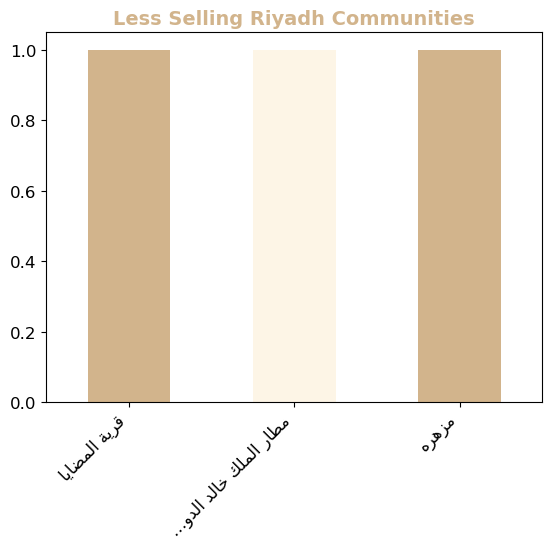

In [44]:
count_Neighbourhood_t=df_clean['Neighbourhood'].value_counts()
landss = count_Neighbourhood_t.tail(3).index.tolist()

# Reshape the labels using arabic_reshaper and get_display
reshaped_labels = [get_display(arabic_reshaper.reshape(label)) for label in landss]

count_Neighbourhood_t.tail(3).plot.bar(fontsize=12, color=('tan', 'oldlace'))
plt.title('Less Selling Riyadh Communities', fontsize=14, weight="bold", color='tan')
plt.xticks(range(len(landss)), reshaped_labels, rotation=45, ha='right')

plt.show()

In [46]:
df3=pd.read_csv(r"real_state_riyadh.csv", usecols= ['Total_price','Neighbourhood'], index_col='Neighbourhood')

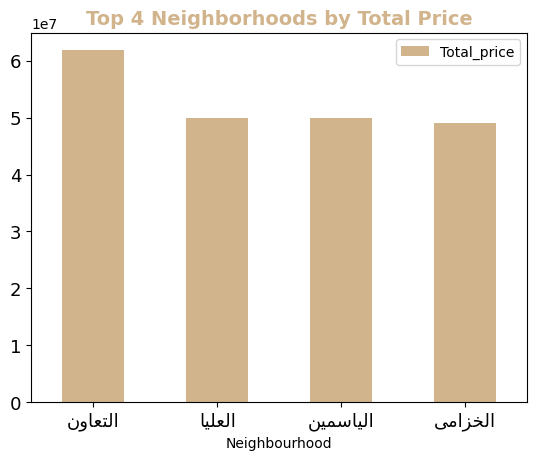

In [47]:
neighborhoods = df3.nlargest(n=4, columns=['Total_price']).index.tolist()


reshaped_labels = [get_display(arabic_reshaper.reshape(label)) for label in neighborhoods]

df3.nlargest(n=4, columns=['Total_price']).plot.bar(fontsize=13, color=('tan','wheat'))
plt.title('Top 4 Neighborhoods by Total Price', fontsize=14, weight="bold", color='tan')
plt.xticks(range(len(neighborhoods)), reshaped_labels, rotation=0, ha='center')
plt.show()